In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 

In [3]:
# นำเข้าข้อมูลจากไฟล์ชื่อ Data Change string to number.csv 
url = 'https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/Data%20Change%20string%20to%20number.csv'
df=pd.read_csv(url)
df.sample(20) 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1498,461895,Male,1,36,1,Entertainment,1,0,2,Cat_6,B
1572,460743,Male,1,55,1,Artist,0,1,3,Cat_6,C
6974,461022,Male,1,69,1,Artist,0,0,1,Cat_3,A
2205,463255,Male,0,42,1,Entertainment,3,0,2,Cat_6,A
3606,462554,Male,0,28,0,Healthcare,1,0,8,Cat_4,C
2660,466570,Female,1,40,1,Artist,0,1,3,Cat_6,A
3982,459845,Male,1,66,1,Healthcare,0,0,1,Cat_4,D
4608,466293,Male,1,79,0,Lawyer,0,2,2,Cat_6,B
5081,463445,Male,1,48,1,Artist,0,1,3,Cat_6,A
396,462769,Female,1,42,0,Homemaker,6,2,4,Cat_6,B


In [4]:
#ดูภาพรวมข้อมูล
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       8068 non-null int64
Age                8068 non-null int64
Graduated          8068 non-null int64
Profession         7944 non-null object
Work_Experience    8068 non-null int64
Spending_Score     8068 non-null int64
Family_Size        8068 non-null int64
Var_1              7992 non-null object
Segmentation       8068 non-null object
dtypes: int64(7), object(4)
memory usage: 693.4+ KB


In [26]:
# เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล
df.columns

Index([u'ID', u'Gender', u'Ever_Married', u'Age', u'Graduated', u'Profession',
       u'Work_Experience', u'Spending_Score', u'Family_Size', u'Var_1',
       u'Segmentation'],
      dtype='object')

In [5]:
#บอกค่าที่หายไปในแต่ละcolumn
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

<Figure size 720x360 with 0 Axes>

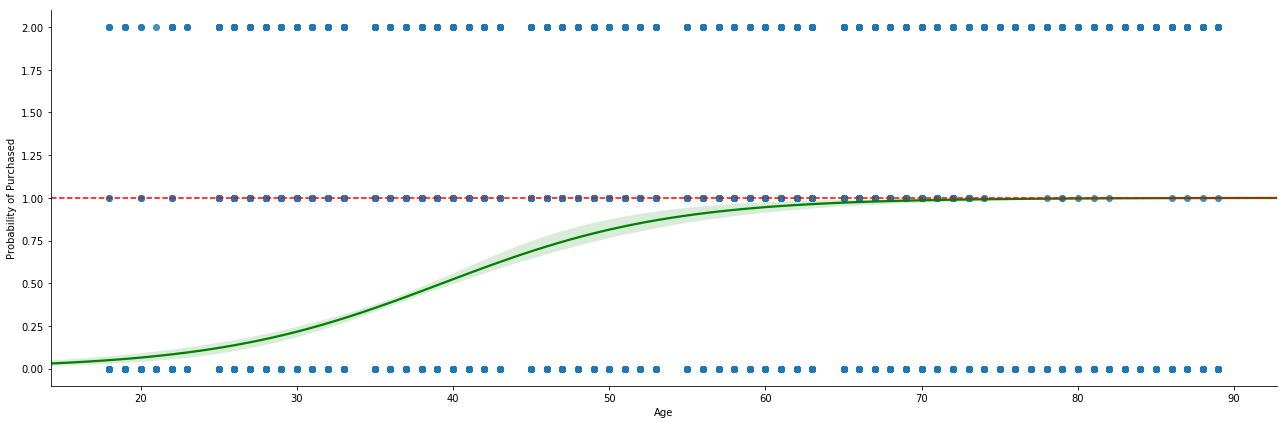

In [7]:
plt.figure(figsize=(10, 5))
sns.lmplot(x='Age', y='Spending_Score', data=df,
           logistic=True, height=6, aspect=3, 
           line_kws={'color': 'green'})
plt.ylabel('Probability of Purchased')
plt.axhline(1, color='red', linestyle='--');

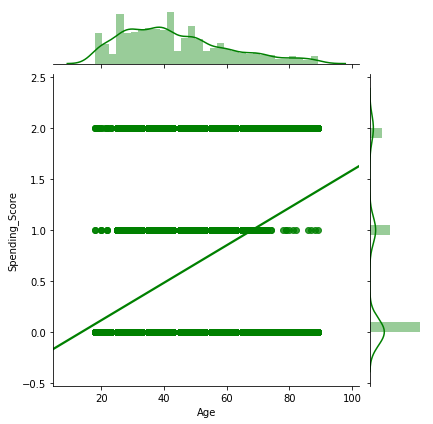

In [8]:
# โดยการใช้ seaborn ทำให้สามารถดูการกระจายตัวของข้อมูล (histogram) ในเเนวเเกน x เเละ y ได้ดังนี้
sns.jointplot(x='Age', y='Spending_Score', data=df, kind='reg', ci=None,
              color='green');

In [9]:
# สร้าง Logistic Regression model โดยใช้ library ของ scikit learn
# นำเข้าคลาสของ Logistic Regression จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# เเบ่งข้อมูลออกเป็นชุดเรียนรู้เเละชุดทดสอบโดยกำหนดให้ชุดทดสอบมีขนาดเป็น 30% ของข้อมูล
# X=df[['Age']]
X=df[['Age']]
y=df['Spending_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
X_train

,Age
3468,62
5470,28
5624,36
7359,33
6773,37
4672,87
5328,41
3556,47
6077,40
452,22


In [11]:
model = LogisticRegression() # สร้าง object ชื่อ model จาก class ของ LogisticRegression class 
model.fit(X_train, y_train)  # สร้าง model LogisticRegression จากข้อมูล X เเละ Y

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# ทดลองเเสดงค่า intercept ( θ0 ) เเละ coefficient ( θ1 )

In [70]:
# intercept 
print('intercept = {model.intercept_}') 
# coefficient
print('coefficient = {model.coef_}') 

intercept = {model.intercept_}
coefficient = {model.coef_}


In [14]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
model.score(X_train, y_train) # accuracy of the model

0.6176731007614663

In [74]:
# model.score(X_test, y_test) # accuracy of the model

In [ ]:
# K-fold cross validation

In [15]:
from sklearn.model_selection import KFold, cross_val_score
# from sklearn.model_selection import cross_val_score
from numpy import mean, std
# from numpy import std

In [16]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.619 (0.009)


In [17]:
scores 

array([0.61327434, 0.62920354, 0.6129318 , 0.60761736, 0.63064659])

In [18]:
# ทดลองการทำนายค่าโดยทำได้ดังนี้

In [19]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_pred,y_true
706,0,1
5322,0,1
6177,0,1
4506,0,1
3051,0,2
3369,0,1
8056,0,1
4507,0,2
6756,0,1
180,0,1


In [21]:
len(dx[dx.y_true != dx.y_pred])

971

In [22]:
dx[dx.y_true == dx.y_pred]

,y_pred,y_true
892,0,0
2642,0,0
3479,0,0
7819,0,0
6801,2,2
6989,0,0
6358,0,0
7999,0,0
738,0,0
67,0,0


In [23]:
# วัดประสิทธิภาพด้วย Confusion matrix

In [25]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('true negative = {tn}')
print('false positive = {fp}')
print('false negative = {fn}')
print('true positive = {tp}')

ValueError: too many values to unpack

In [27]:
print('accuracy = {metrics.accuracy_score(y_test, predicted)}')
print('precision = {metrics.precision_score(y_test, predicted)}')
print('recall = {metrics.recall_score(y_test, predicted)}')

accuracy = {metrics.accuracy_score(y_test, predicted)}
precision = {metrics.precision_score(y_test, predicted)}
recall = {metrics.recall_score(y_test, predicted)}


In [28]:
# Multiple Logistic Regression

In [29]:
df=pd.read_csv(url, usecols=list(range(2, 5)))
df.head()

,Ever_Married,Age,Graduated
0,0,22,0
1,1,38,1
2,1,67,1
3,1,67,1
4,1,40,1


In [ ]:
# ทดลองดูความสัมพันธ์ระหว่างคุณลักษณะ

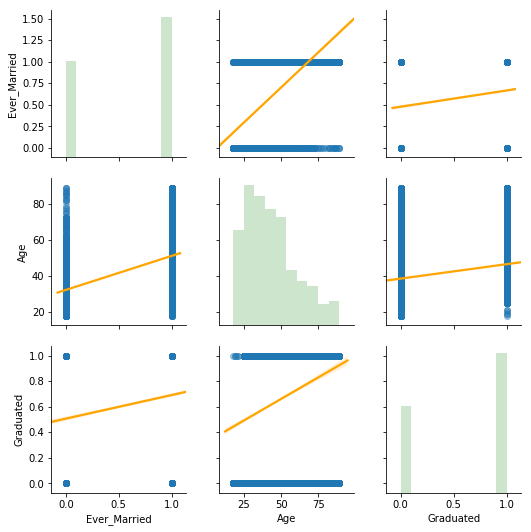

In [30]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [34]:
# สร้าง multiple logistic regression model
X = df.drop(columns=['Age'])
y = df['Age']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [35]:
X

,Ever_Married,Graduated
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,0,1
7,0,1
8,1,1
9,1,1


In [36]:
mplo = LogisticRegression() 
mplo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
# ทดลองเเสดงค่า intercept คือ  θ0 ,  θ1  และ  θ2
# intercept 
print('intercept = {mplo.intercept_}') # theta0
# coefficient
print('coefficient = {mplo.coef_}') # theta1 theta2 theta3

intercept = {mplo.intercept_}
coefficient = {mplo.coef_}


In [47]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
R_squared_error_training = R_squred_train
print(R_squared_error_training)

0.048961884102881936


In [53]:
# R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
# print(f'R_squared_error_training = {R_squred_train}') 
# R_squred = mplo.score(X_test, y_test) 
# print(f'R_squared_error = {R_squred}') 

In [54]:
# Cross valiation

In [55]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(mplo, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.044 (0.003)


In [56]:
# ทดลองทำนายผลลัพธ์
predicted = mplo.predict(X_test)
predicted 

array([35, 47, 47, ..., 27, 27, 47], dtype=int64)

In [57]:
predicted = mplo.predict(X_test)
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_pred,y_true
1186,35,43
2568,47,60
309,47,49
4646,27,32
7138,27,35
7644,47,41
7142,35,41
292,19,32
3284,27,41
4998,35,43


In [59]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('true negative = {tn}')
print('false positive = {fp}')
print('false negative = {fn}')
print('true positive = {tp}')

ValueError: too many values to unpack

In [67]:
accuracy = metrics.accuracy_score(y_test, predicted)
print(accuracy)
precision = metrics.precision_score(y_test, predicted)
print(precision)
recall = metrics.recall_score(y_test, predicted)
print(recall)

0.04399008674101611


ValueError: Target is multiclass but average='binary'. Please choose another average setting.